# Process Mining Embeddings: Learning Vector Representations for Petri Nets

### Summary
Embedding vectors are numerical representations of objects or concepts in a continuous vector space. They are commonly used in machine learning tasks because they capture semantic relationships between entities. In process mining, embeddings can provide a powerful means of representing complex process structures and relationships within process models. For example, we can embed individual activities, control flow structures, or entire process models in vector representations. This enables sophisticated similarity analysis, the identification of analogous patterns, and the application of predictive modeling techniques that would be difficult to achieve with traditional process representations. This repository is dedicated to our proposed approach, wich enables us to encode both the structural information of Process models, in Petri Net format, and the individual tasks into compact vector representations, facilitating various downstream tasks such as similarity analysis and process mining.

## How to use PetriNet2Vec

Dependecies (recomended order):

* sudo apt install libopenblas-dev

* pip install scipy==1.11.1

* pip install gensim

* pip install pm4py

* pip install requests

* sudo apt-get install graphviz

* pip install -i https://test.pypi.org/simple/ PetriNet2Vec

In [1]:
# Necessary imports
import os
import pm4py

# $ pip install -i https://test.pypi.org/simple/ PetriNet2Vec==1.0.1 --no-deps
from PetriNet2Vec import PetriNet2Vec

pm4py.util.constants.SHOW_PROGRESS_BAR = False
import warnings
warnings.filterwarnings('ignore')
import requests, zipfile, io

In [2]:
# Download dataset for training 
# The PDC 2023 folder contains the dataset used in the Process Discovery Contest of 2023.
# The data set contains 96 models stored as .pnml files.
r = requests.get('https://data.4tu.nl/file/afd6f608-469e-48f9-977d-875b45840d39/e8eaeb15-b503-443c-8666-43f3c5261eb2')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("Models")

In [3]:
# Load the models with pm4py
models = sorted(os.listdir('./Models/'))
petriNets = []
petriNets_im = []
petriNets_fm = []
for model in models:
    net, im, fm = pm4py.read_pnml(os.path.join('./Models/', model))
    petriNets.append(net)
    petriNets_im.append(im)
    petriNets_fm.append(fm)

In [4]:
# Vector Embedding Learning
pnml2vec = PetriNet2Vec(embedding_dim=8, # '8' minimum acceptable number of embedding dimensions
                        workers=8)       # number of paraller works

pnml2vec.fit(petriNets, epochs=1000)
pnml2vec.save_model("trained_model")

Embeddings Vector: [ 1.0626423  -0.38950545 -1.1086938   0.6579229  -1.6875144   0.17964472
  0.6990782  -0.41600406]

Petri net model:


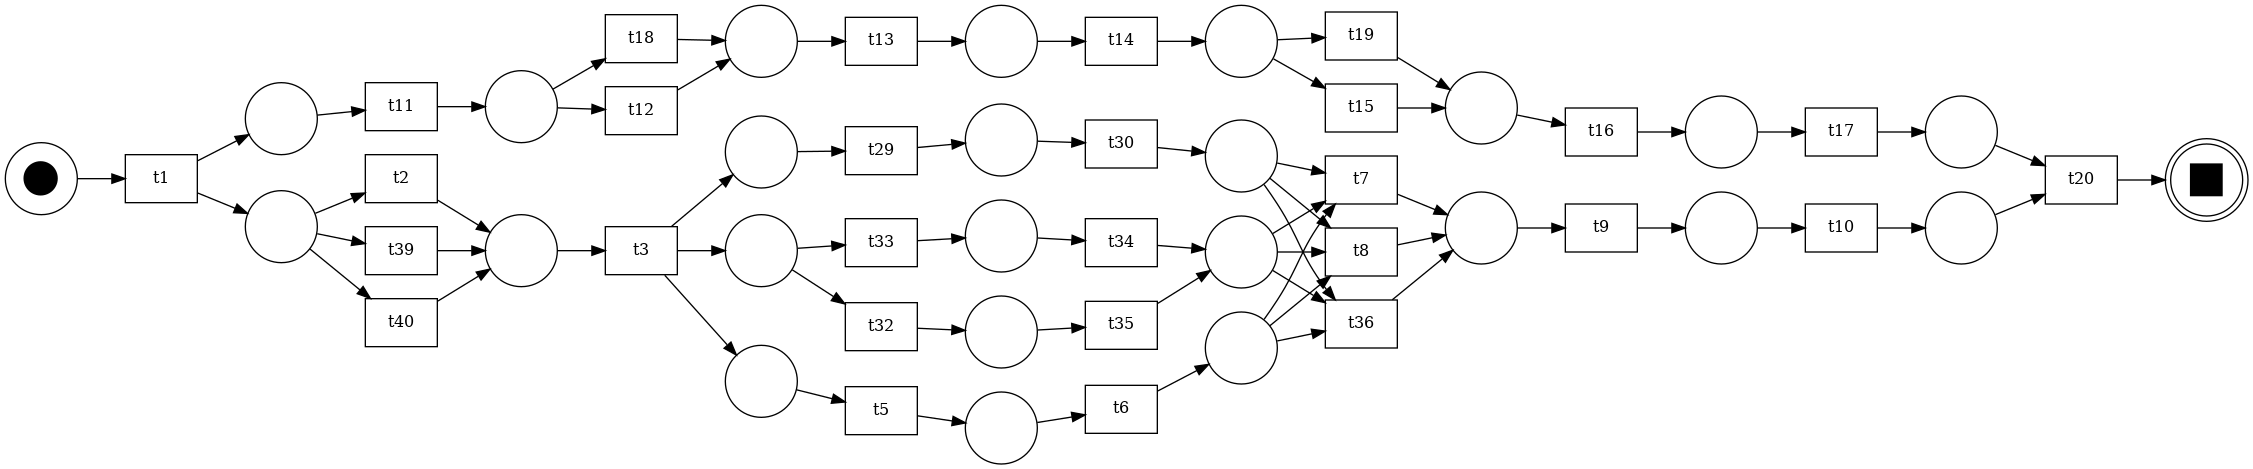

In [8]:
# Getting embedding vectors
embeddings_vectors = pnml2vec.get_net_embeddings()
# showing the fisrt Petri net and its embedding
print('Embeddings Vector:' ,embeddings_vectors[0])
print('\nPetri net model:')
pm4py.view_petri_net(petriNets[0], petriNets_im[0], petriNets_fm[0])
